In [1]:
from census import Census
from us import states
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
c = Census("5f7e25f1ce5f52828e64cc4e5ff5f470759b4e03")

In [3]:
test = c.acs5.state(('B25034_011E'), states.OR.fips)

In [4]:
variable_list = ['B25034_003E', 'B25034_004E', 'B25034_005E','B25034_006E', 
                 'B25034_007E','B25034_008E', 'B25034_009E', 'B25034_010E', 
                 'B25034_011E']

In [5]:
test = c.acs5.state((variable_list), states.OR.fips)

In [6]:
test

[{'B25034_003E': 132994.0,
  'B25034_004E': 251534.0,
  'B25034_005E': 293362.0,
  'B25034_006E': 194274.0,
  'B25034_007E': 330075.0,
  'B25034_008E': 162452.0,
  'B25034_009E': 140051.0,
  'B25034_010E': 92807.0,
  'B25034_011E': 197940.0,
  'state': '41'}]

In [7]:
# Make DataFrame
df = pd.DataFrame(test)

# Drop last column
df = df.drop(['state'], axis=1)

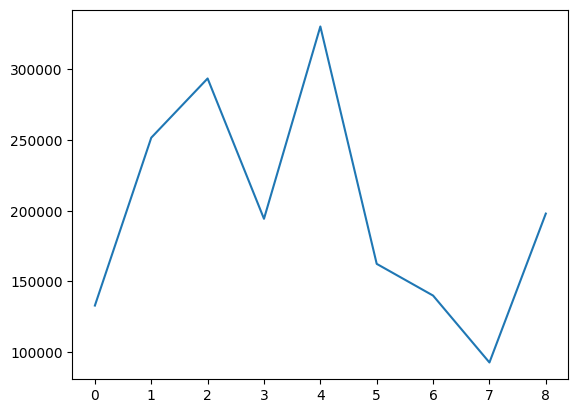

In [8]:
plt.plot(df.values[0])

In [9]:
test = c.acs5.state_county_tract((variable_list), states.OR.fips, Census.ALL, Census.ALL)

In [10]:
df = pd.DataFrame(test)

In [11]:
print(states.OR.fips)

41


In [12]:
import geopandas as gpd
geo = gpd.read_file('/Users/jryan4/Downloads/tl_2021_41_tract/tl_2021_41_tract.shp')

In [51]:
new_df = pd.merge(geo, df, left_on=['TRACTCE', 'COUNTYFP'], right_on=['tract', 'county'], how='inner')

In [52]:
type(new_df)

geopandas.geodataframe.GeoDataFrame

<Axes: >

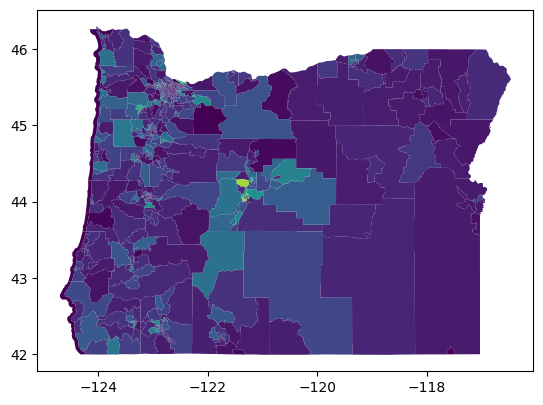

In [54]:
new_df.plot('B25034_004E')